In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Zadanie 9.1

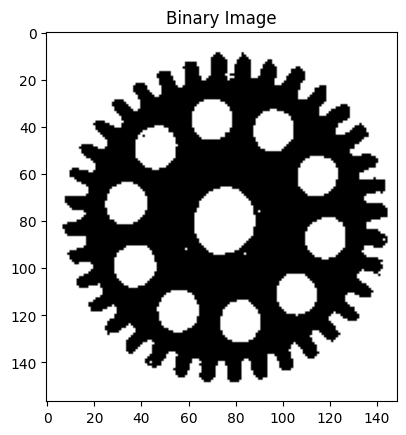

In [110]:
# Wczytanie obrazu
image_og = cv2.imread('trybik.jpg')

image = cv2.cvtColor(image_og, cv2.COLOR_BGR2GRAY)

# Binaryzacja obrazu
_, bin_img = cv2.threshold(image, 230, 255, cv2.THRESH_BINARY)

plt.imshow(bin_img, cmap='gray')
plt.title('Binary Image')
plt.show()

In [111]:
# Zanegowanie obrazu
neg_img = cv2.bitwise_not(bin_img)

# Znalezienie konturów
contours, hierarchy = cv2.findContours(neg_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

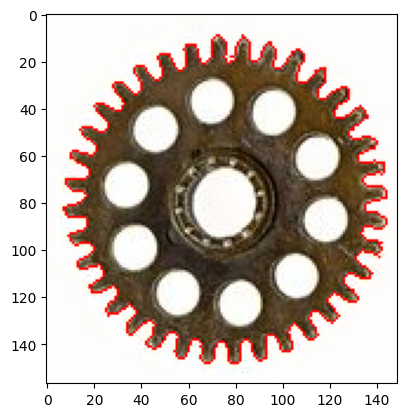

In [112]:
# Rysowanie konturów na obrazie
cv2.drawContours(image_og, contours, 0, (0, 0, 255))
plt.imshow(cv2.cvtColor(image_og, cv2.COLOR_BGR2RGB))
plt.show()

In [113]:
# Filtry Sobela
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

# Amplituda gradientu
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
gradient_orientation = np.arctan2(sobely, sobelx) * (180 / np.pi) % 360

# Normalizacja amplitudy gradientu
gradient_magnitude = gradient_magnitude / np.amax(gradient_magnitude)

In [114]:
# Wyznaczenie momentów
moments = cv2.moments(bin_img)
center_x = int(moments['m10'] / moments['m00'])
center_y = int(moments['m01'] / moments['m00'])

In [115]:
# Inicjalizacja R-table
Rtable = [[] for _ in range(360)]

# Wypełnienie R-table
for contour in contours[:1]:
    for point in contour:
        x, y = point.ravel()  # Użyj ravel() aby rozpakować współrzędne
        r = np.sqrt((x - center_x)**2 + (y - center_y)**2)
        theta = np.arctan2(y - center_y, x - center_x) * (180 / np.pi) % 360
        gradient_angle = int(gradient_orientation[y, x])
        Rtable[gradient_angle].append((r, theta))


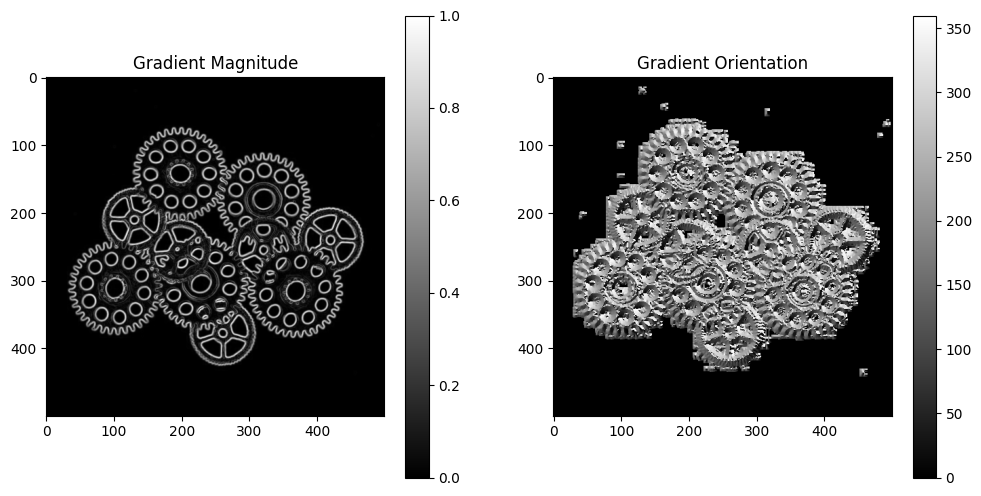

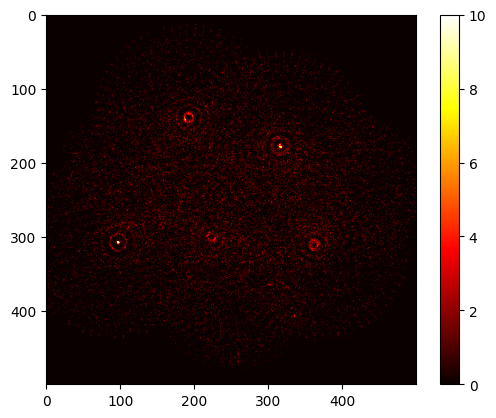

In [142]:
# Wczytanie obrazu do wyszukiwania
search_image_og = cv2.imread('trybiki2.jpg')

search_image = cv2.cvtColor(search_image_og, cv2.COLOR_BGR2GRAY)

# Filtry Sobela dla obrazu wyszukiwania
sobelx_search = cv2.Sobel(search_image, cv2.CV_64F, 1, 0, ksize=5)
sobely_search = cv2.Sobel(search_image, cv2.CV_64F, 0, 1, ksize=5)

# Amplituda gradientu
gradient_magnitude_search = np.sqrt(sobelx_search**2 + sobely_search**2)
gradient_orientation_search = np.arctan2(sobely_search, sobelx_search) * (180 / np.pi) % 360

# Normalizacja amplitudy gradientu
gradient_magnitude_search = gradient_magnitude_search / np.amax(gradient_magnitude_search)

# Debug: Visualize gradient magnitude and orientation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gradient_magnitude_search, cmap='gray')
plt.title('Gradient Magnitude')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(gradient_orientation_search, cmap='gray')
plt.title('Gradient Orientation')
plt.colorbar()
plt.show()

# Inicjalizacja przestrzeni Hougha
hough_space = np.zeros(search_image.shape)

# Wypełnienie przestrzeni Hougha
for y in range(search_image.shape[0]):
    for x in range(search_image.shape[1]):
        if gradient_magnitude_search[y, x] > 0.5:
            gradient_angle = int(gradient_orientation_search[y, x])
            for r, theta in Rtable[gradient_angle]:
                x1 = int(x - r * np.cos(np.deg2rad(theta)))
                y1 = int(y - r * np.sin(np.deg2rad(theta)))
                if 0 <= x1 < hough_space.shape[1] and 0 <= y1 < hough_space.shape[0]:
                    hough_space[y1, x1] += 1


# Wyświetlenie przestrzeni Hougha
plt.imshow(hough_space, cmap='hot', vmax=10)
plt.colorbar()
plt.show()

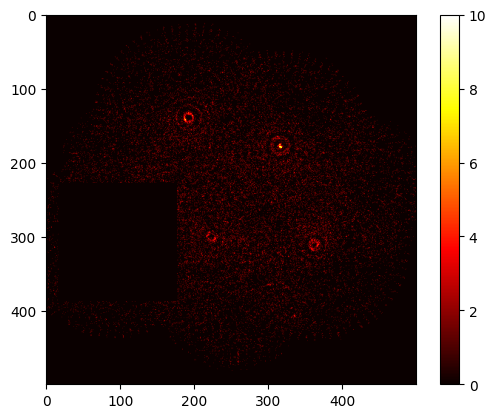

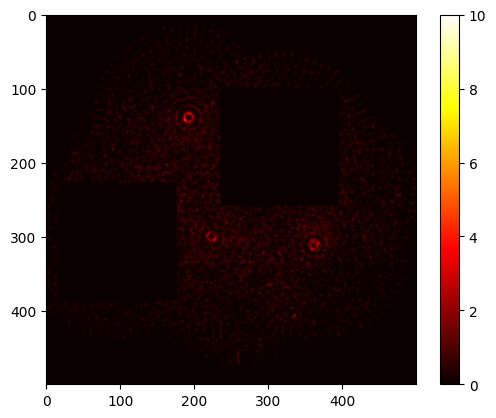

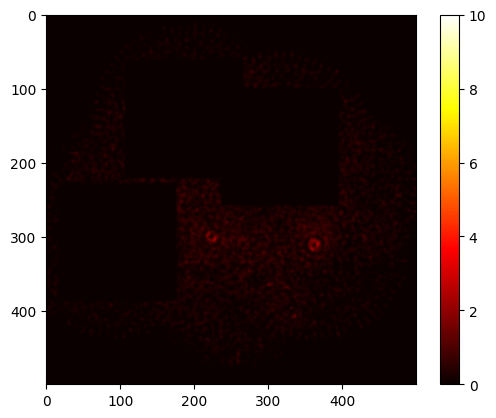

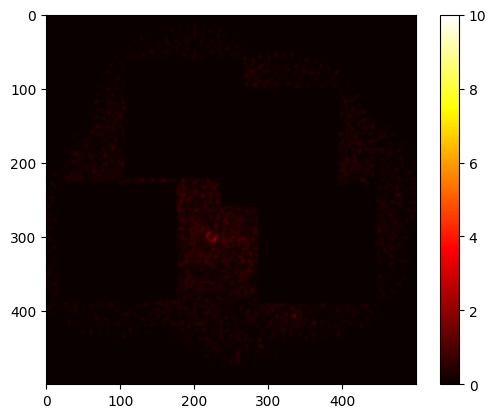

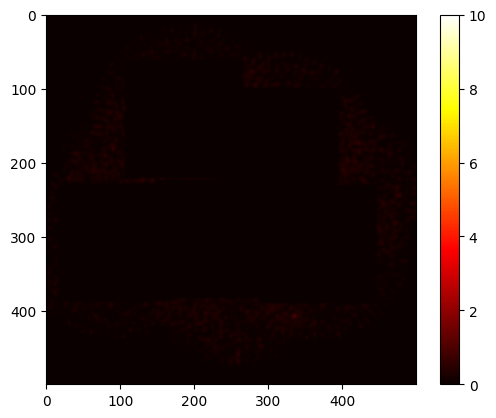

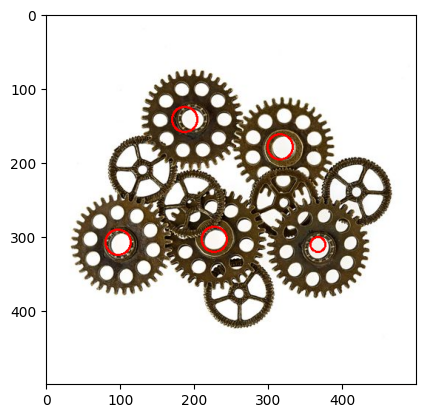

In [143]:
search_image_og_copy = search_image_og.copy()

y, x = np.where(hough_space == np.max(hough_space))
x = x[0]
y = y[0]

cv2.circle(search_image_og_copy, (x, y), 17, (0, 0, 255), thickness=2)

# zero out the neighborhood of the point
hough_space[y-80:y+80, x-80:x+80] = 0

plt.imshow(hough_space, cmap='hot', vmax=10)
plt.colorbar()
plt.show()

y, x = np.where(hough_space == np.max(hough_space))
x = x[0]
y = y[0]

cv2.circle(search_image_og_copy, (x, y), 17, (0, 0, 255), thickness=2)

# zero out the neighborhood of the point
hough_space[y-80:y+80, x-80:x+80] = 0

# Apply Gaussian blur to the Hough space
hough_space = cv2.GaussianBlur(hough_space, (5, 5), 0)

plt.imshow(hough_space, cmap='hot', vmax=10)
plt.colorbar()
plt.show()

y, x = np.where(hough_space == np.max(hough_space))
x = x[0]
y = y[0]

cv2.circle(search_image_og_copy, (x, y), 17, (0, 0, 255), thickness=2)

# zero out the neighborhood of the point
hough_space[y-80:y+80, x-80:x+80] = 0

hough_space = cv2.GaussianBlur(hough_space, (5, 5), 0)

plt.imshow(hough_space, cmap='hot', vmax=10)
plt.colorbar()
plt.show()

y, x = np.where(hough_space == np.max(hough_space))
x = x[0]
y = y[0]

cv2.circle(search_image_og_copy, (x, y), 10, (0, 0, 255), thickness=2)

# zero out the neighborhood of the point
hough_space[y-80:y+80, x-80:x+80] = 0

hough_space = cv2.GaussianBlur(hough_space, (5, 5), 0)

plt.imshow(hough_space, cmap='hot', vmax=10)
plt.colorbar()
plt.show()

y, x = np.where(hough_space == np.max(hough_space))
x = x[0]
y = y[0]

cv2.circle(search_image_og_copy, (x, y), 17, (0, 0, 255), thickness=2)

# zero out the neighborhood of the point
hough_space[y-80:y+80, x-80:x+80] = 0

hough_space = cv2.GaussianBlur(hough_space, (5, 5), 0)

plt.imshow(hough_space, cmap='hot', vmax=10)
plt.colorbar()
plt.show()

plt.imshow(cv2.cvtColor(search_image_og_copy, cv2.COLOR_BGR2RGB))
plt.show()